In [27]:
import tensorflow as tf
from tensorflow import keras

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.0'

In [3]:
keras.__version__

'2.4.0'

In [6]:
# load in the fashion MNIST dataset from tf
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


(60000, 28, 28) (60000,)
uint8


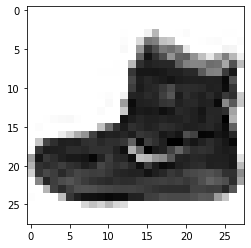

In [20]:
print(X_train_full.shape, y_train_full.shape)
print(X_train_full.dtype)
plt.imshow(X_train_full[0], cmap="binary")

In [46]:
# create validation set from training set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # normalize
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [47]:
# create list of class names that corresponds to output indices
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle Boot"]

In [48]:
# build the neural network architecture
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [49]:
# optionally change imports as well
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# rather than adding the layers individually, you can also just pass them as a list to the Sequential model
model = keras.models.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(10, activation="softmax")
])

In [50]:
# give a summary of all the layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [51]:
# see layers to get the index of a specific layer
model.layers

In [52]:
hidden1 = model.layers[1]
hidden1.name

'dense_17'

In [53]:
model.get_layer('dense_11') is hidden1

ValueError: No such layer: dense_11.

In [54]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03006249,  0.06535044,  0.06637624, ..., -0.03487838,
         0.03117284,  0.02806967],
       [ 0.06330633,  0.05701444, -0.07439771, ..., -0.03727491,
         0.06035456,  0.00583307],
       [-0.0096406 , -0.03415341, -0.03741802, ..., -0.04324678,
        -0.03293091,  0.00106604],
       ...,
       [-0.05612621, -0.07272078,  0.01580539, ...,  0.0523435 ,
        -0.0216198 ,  0.0064464 ],
       [ 0.00876334, -0.04002392, -0.05675386, ...,  0.04722013,
        -0.05255324,  0.00062093],
       [ 0.0223384 , -0.04892302, -0.02105027, ...,  0.03046186,
        -0.03654739, -0.01907495]], dtype=float32)

In [55]:
weights.shape

(784, 300)

In [56]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
biases.shape

(300,)

In [58]:
# after you create the model, you must compile the model to specify the loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9865 - accuracy: 0.6864 - val_loss: 0.5027 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5030 - accuracy: 0.8275 - val_loss: 0.4539 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8419 - val_loss: 0.4097 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4217 - accuracy: 0.8522 - val_loss: 0.3968 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4076 - accuracy: 0.8582 - val_loss: 0.3741 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3870 - accuracy: 0.8627 - val_loss: 0.3721 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8700 - val_loss: 0.3716 - val_accuracy:

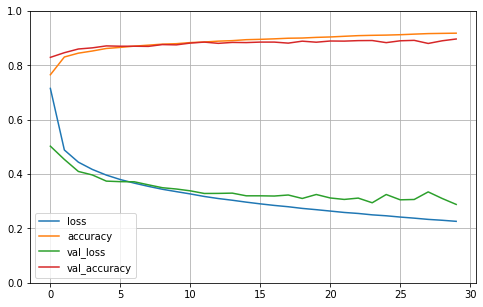

In [60]:
# the fit() method returns a history object which we can use to plot learning metrics
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.5821 - accuracy: 0.8448


[63.58210754394531, 0.8447999954223633]

In [62]:
# use the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
y_pred = model.predict_classes(X_new) # deprecated
y_pred

/home/joshbeasley/ml/ml_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [69]:
# use np.argmax instead
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1])

In [70]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [76]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)